In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [3]:
IMG_SIZE=50
dataset=r'C:\\Users\\DELL\\images_datasetANN\\train'
categories=['GuideSign','M1','M4','M5','M6','M7',"P1",'P10_50',"P12",'W1']

In [4]:
training_data=[]

for c in categories:
    path=os.path.join(dataset,c)
    class_num=categories.index(c)
    for img in os.listdir(path):
        try:
            img_arrary=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_arrary,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass


In [5]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:4]:
    print(sample[1])
print(new_array)

3
0
2
5
[[166 166 166 ... 163 162 162]
 [166 166 166 ... 163 162 162]
 [166 166 166 ... 162 162 162]
 ...
 [ 74  35  29 ...  35  41  40]
 [ 77  54  49 ...   8   5  14]
 [ 87  87 118 ...  21  16  17]]


In [10]:
X=[]
y=[]
from sklearn.model_selection import train_test_split

6024
6024


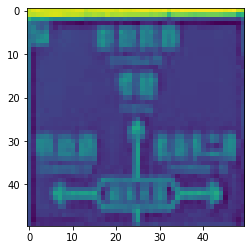

In [11]:
for feature ,label in training_data: 
    X.append(feature)
    y.append(label)
plt.imshow(X[1])
Q=X[0]/255
Q
print(len(y))
print(len(X))

In [12]:
X=np.array(X)
y=np.array(y)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [14]:
X_train=X_train/255
X_test=X_test/255

X_train_flatten=X_train.reshape(len(X_train),50*50)
X_test_flatten=X_test.reshape(len(X_test),50*50)

In [15]:
X_test_flatten.shape

(1205, 2500)

In [16]:
X_train[0]
X_train_flatten[0]

array([0.42352941, 0.38039216, 0.35294118, ..., 0.32941176, 0.32941176,
       0.32941176])

In [17]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,input_shape=(2500,), activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
ann.compile(
    loss='sparse_categorical_crossentropy',
     metrics=['accuracy']
)
history=ann.fit(X_train_flatten, y_train,epochs=100)

Epoch 1/100
151/151 [==============================] - 0s 796us/step - loss: 1.3562 - accuracy: 0.5773
Epoch 2/100
151/151 [==============================] - 0s 755us/step - loss: 1.0396 - accuracy: 0.6931
Epoch 3/100
151/151 [==============================] - 0s 759us/step - loss: 0.9268 - accuracy: 0.7134
Epoch 4/100
151/151 [==============================] - 0s 844us/step - loss: 0.8681 - accuracy: 0.7282
Epoch 5/100
151/151 [==============================] - 0s 803us/step - loss: 0.8240 - accuracy: 0.7425
Epoch 6/100
151/151 [==============================] - 0s 901us/step - loss: 0.8022 - accuracy: 0.7522
Epoch 7/100
151/151 [==============================] - 0s 832us/step - loss: 0.7860 - accuracy: 0.7568
Epoch 8/100
151/151 [==============================] - 0s 766us/step - loss: 0.7564 - accuracy: 0.7686
Epoch 9/100
151/151 [==============================] - 0s 784us/step - loss: 0.7439 - accuracy: 0.7719
Epoch 10/100
151/151 [==============================] - 0s 783us/step - l

151/151 [==============================] - 0s 782us/step - loss: 0.4121 - accuracy: 0.8763
Epoch 80/100
151/151 [==============================] - 0s 835us/step - loss: 0.4087 - accuracy: 0.8796
Epoch 81/100
151/151 [==============================] - 0s 795us/step - loss: 0.4177 - accuracy: 0.8780
Epoch 82/100
151/151 [==============================] - 0s 780us/step - loss: 0.4068 - accuracy: 0.8796
Epoch 83/100
151/151 [==============================] - 0s 789us/step - loss: 0.4090 - accuracy: 0.8786
Epoch 84/100
151/151 [==============================] - 0s 822us/step - loss: 0.4033 - accuracy: 0.8790
Epoch 85/100
151/151 [==============================] - 0s 730us/step - loss: 0.4038 - accuracy: 0.8788
Epoch 86/100
151/151 [==============================] - 0s 771us/step - loss: 0.4128 - accuracy: 0.8799
Epoch 87/100
151/151 [==============================] - 0s 741us/step - loss: 0.4071 - accuracy: 0.8767
Epoch 88/100
151/151 [==============================] - 0s 802us/step - loss:

In [18]:
ann.evaluate(X_test_flatten,y_test)

38/38 [==============================] - 0s 823us/step - loss: 0.5498 - accuracy: 0.8490


[0.5498490333557129, 0.848962664604187]

2

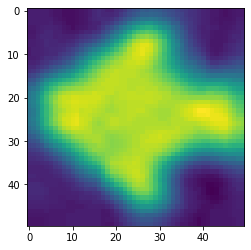

In [19]:
y_pred = ann.predict(X_test_flatten)

plt.imshow(X_test[0])
np.argmax(y_pred[0])

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

# confusion_matrix && accuracy_score

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)
accuracy_score(y_test, y_predicted_labels)

tf.Tensor(
[[216   0  28   0   1   4   4   0   0   1]
 [  0  32   4   0   0   2   8   0   0   0]
 [ 32   5 590   1   0   5   0   3   0   0]
 [  5   5  15  14   5   0   1   0   0   0]
 [  1   4   3   2  20   0   0   0   0   0]
 [  5   4   2   0   0  75   1   0   0   1]
 [  4   3   2   0   0   2  33   0   0   0]
 [  0   0   1   0   0   0   0  11   0   0]
 [  0   0   6   0   0   0   1   0   9   0]
 [  1   0   1   0   0   9   0   0   0  23]], shape=(10, 10), dtype=int32)


0.8489626556016597

# ROC Model

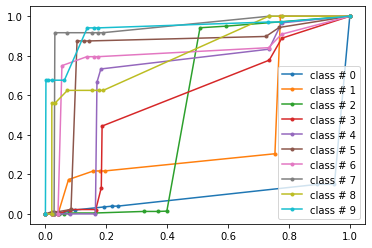

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from collections import Counter

y_pred1 = ann.predict(X_test_flatten)
y_pred1=[np.argmax(i) for i in y_pred1]




for i in range(10):
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred1, pos_label=i)
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras,marker='.'.format(), label='class # %0.f' % i)
    
plt.legend(loc="lower right")


# loss curve

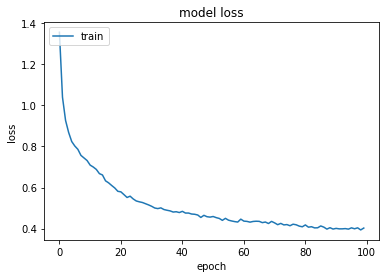

In [23]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()